<a href="https://colab.research.google.com/github/Anushka091922/Project-DNA/blob/main/DNA_data_compession_and_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
from torch.utils.data import DataLoader



In [ ]:
# Download the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 120519089.21it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28435608.88it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29870648.03it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11759585.66it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Create DataLoader for training and testing
batch_size = 64
train_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=mnist_test, batch_size=batch_size, shuffle=False)

In [ ]:
# Define the architecture of the Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
# Instantiate the Autoencoder, loss function, and optimizer
autoencoder = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

In [ ]:
# Training the Autoencoder
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = Variable(img)

        # Forward pass
        output = autoencoder(img)
        loss = criterion(output, img)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.0269
Epoch [2/10], Loss: 0.0209
Epoch [3/10], Loss: 0.0230
Epoch [4/10], Loss: 0.0163
Epoch [5/10], Loss: 0.0179
Epoch [6/10], Loss: 0.0149
Epoch [7/10], Loss: 0.0126
Epoch [8/10], Loss: 0.0139
Epoch [9/10], Loss: 0.0121
Epoch [10/10], Loss: 0.0127


In [ ]:
# Display the predicted DNA sequences
predicted_labels = torch.argmax(output_dna, dim=1)
print("Predicted DNA sequences labels:", predicted_labels)


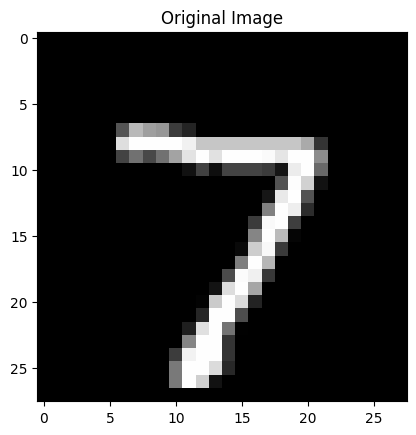

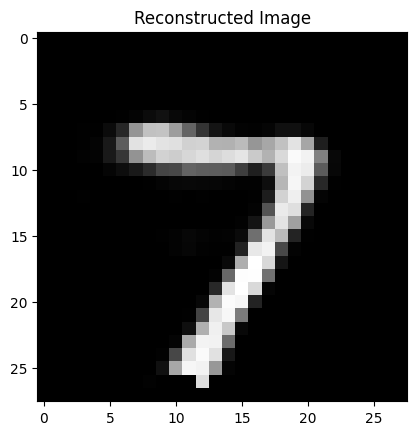

In [ ]:
# Display the original and reconstructed images
import matplotlib.pyplot as plt

def imshow(img, title):
    img = img.view(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

imshow(img[0], title='Original Image')
imshow(output[0], title='Reconstructed Image')